In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Informações da questão

In [2]:
td = [6,12.5,19,25,37,42.5,48.5,53,57,61.5,66,71,76.5] # Tempo do levantamento direto
tr=[6,12.5,17,19.5,25,30.5,37.5,45.5,52,59,65.5,71,76.5] # Tempo do levantamento reverso
receptor = np.asarray([12.5,25,37.5,50,75,100,125,150,175,200,225,250,275]) # Posição dos receptores

In [3]:
receptor2 = np.max(receptor) - receptor #mudando o referêncial do levantamento reverso

#### <center> Plotando o sismograma sintético</center>

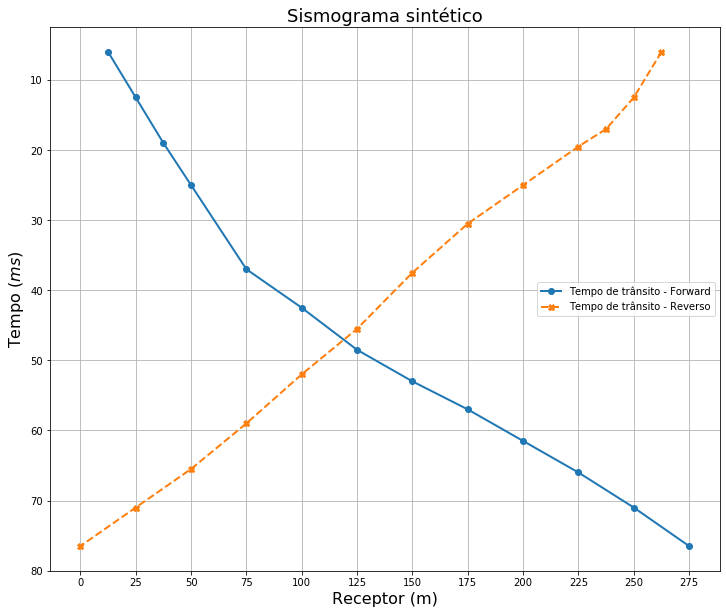

In [14]:
fig,axes = plt.subplots(figsize=(12,10))

#Plotando os tempos de trânsito direto e reverso
axes.plot(receptor,td,marker='o',lw=2,label='Tempo de trânsito - Forward')
axes.plot(receptor2,tr,marker='X',lw=2,ls='--',label='Tempo de trânsito - Reverso')

#Configurando as labels dos eixos
axes.set_ylabel('Tempo ($m s$)',fontsize=16)
axes.set_xlabel('Receptor (m)',fontsize=16)
axes.set_title('Sismograma sintético',fontsize=18)

#Configurando xticks
axes.set_xticks(np.arange(0,300,25))

#Desenhando o grid
axes.grid()

#Invertendo o eixo y
axes.invert_yaxis()

#Colocando legendas
axes.legend()

#Salvandor a figura
fig.savefig('gráfico-questão-4-cor.png',dpi=300)

#### <center> Análise do levantamento direto </center>

$$ \frac{1}{v_i}= \alpha_i = \frac{t_{i+1}-t_i}{x_{i+1}-x_i}$$

In [27]:
# Calculando os coeficientes angulares e velocidades instantâneas
coefd = []
for i in range(0,len(td)-1):
    coefd.append((td[i+1]-td[i])/(receptor[i+1]-receptor[i]))

coefd = np.asanyarray(coefd)
vel = 1/coefd

In [28]:
print('Coeficientes ângulares:')
print(coefd)
print('\n Velocidades instantâneas:')
print(vel)

Coeficientes ângulares:
[0.52 0.52 0.48 0.48 0.22 0.24 0.18 0.16 0.18 0.18 0.2  0.22]

 Velocidades instantâneas:
[1.92307692 1.92307692 2.08333333 2.08333333 4.54545455 4.16666667
 5.55555556 6.25       5.55555556 5.55555556 5.         4.54545455]


#### <center> Análise do levantamento direto e reverso </center>


In [29]:
# Calculando os coeficientes angulares e velocidades instantâneas
coefr = []
for i in range(0,len(td)-1):
    coefr.append((tr[i+1]-tr[i])/(receptor[i+1]-receptor[i]))

coefr = np.asanyarray(coefr)
velr = 1/coefr

In [30]:
print('Coeficientes ângulares:')
print(coefr)
print('\n Velocidades instantâneas:')
print(velr)

Coeficientes ângulares:
[0.52 0.36 0.2  0.22 0.22 0.28 0.32 0.26 0.28 0.26 0.22 0.22]

 Velocidades instantâneas:
[1.92307692 2.77777778 5.         4.54545455 4.54545455 3.57142857
 3.125      3.84615385 3.57142857 3.84615385 4.54545455 4.54545455]


#### Plotando as retas referentes aos coeficientes escolhidos

In [31]:
def reta_refratada(x,x0,y0,alpha):
    return alpha*x - alpha*x0 + y0

def reta_direta(x,alpha):
    return x*alpha

##### <center> Análise direta </center>


<table>
  <tr>
    <th>Camada</th>
    <th>$\alpha_{direta}$</th>
    <th>$v_{appd}$</th>
    <th>$\alpha_{reversa}$</th>
    <th>$v_{appr}$</th>
  </tr>
  <tr>
    <td>01<br></td>
    <td>0,52</td>
    <td>1923</td>
    <td>0,52</td>
    <td>1923</td>
  </tr>
  <tr>
    <td>02</td>
    <td>0,48</td>
    <td>2083</td>
    <td>0,36</td>
    <td>2777</td>
  </tr>
  <tr>
    <td>03</td>
    <td>0,22</td>
    <td>4545</td>
    <td>0,22</td>
    <td>4545</td>
  </tr>
  <tr>
    <td>04</td>
    <td>0,18</td>
    <td>5555</td>
    <td></td>
    <td></td>
  </tr>
</table>


In [38]:
coefd

array([0.52, 0.52, 0.48, 0.48, 0.22, 0.24, 0.18, 0.16, 0.18, 0.18, 0.2 ,
       0.22])

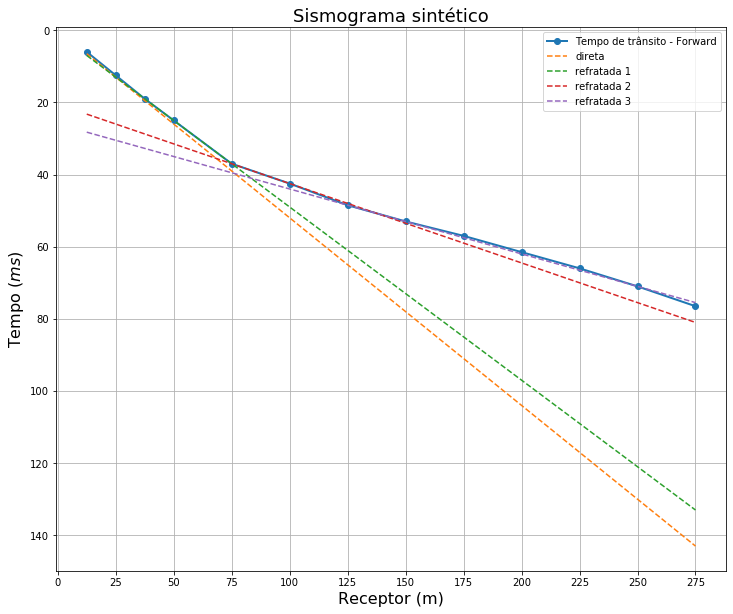

In [43]:
fig, axes = plt.subplots(figsize=(12,10))

#Plotando os tempos de trânsito
axes.plot(receptor,td,marker='o',lw=2,label='Tempo de trânsito - Forward')

axes.plot(receptor,reta_direta(receptor,0.52),ls='--',label='direta')

axes.plot(receptor,reta_refratada(receptor,receptor[2],td[2],0.48),ls='--',label='refratada 1')

axes.plot(receptor,reta_refratada(receptor,receptor[4],td[4],0.22),ls='--',label='refratada 2')

axes.plot(receptor,reta_refratada(receptor,receptor[6],td[6],0.18),ls='--',label='refratada 3')

#Configurando as labels dos eixos
axes.set_ylabel('Tempo ($m s$)',fontsize=16)
axes.set_xlabel('Receptor (m)',fontsize=16)
axes.set_title('Sismograma sintético',fontsize=18)

#Configurando xticks
axes.set_xticks(np.arange(0,300,25))

#Desenhando o grid
axes.grid()

#Invertendo o eixo y
axes.invert_yaxis()

#Colocando legendas
axes.legend()


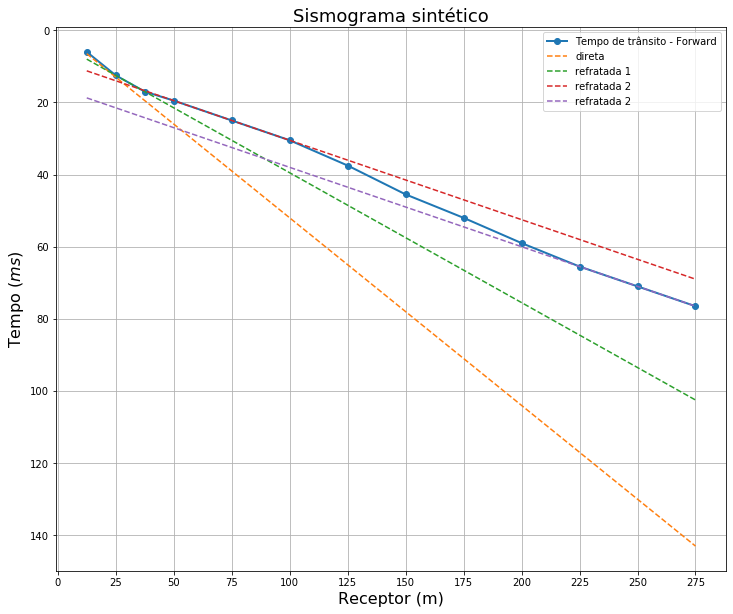

In [103]:
fig, axes = plt.subplots(figsize=(12,10))

#Plotando os tempos de trânsito
axes.plot(receptor,tr,marker='o',lw=2,label='Tempo de trânsito - Forward')

axes.plot(receptor,reta_direta(receptor,0.52),ls='--',label='direta')

axes.plot(receptor,reta_refratada(receptor,receptor[2],tr[2],0.36),ls='--',label='refratada 1')

axes.plot(receptor,reta_refratada(receptor,receptor[4],tr[4],0.22),ls='--',label='refratada 2')

axes.plot(receptor,reta_refratada(receptor,receptor[-1],tr[-1],0.22),ls='--',label='refratada 2')



#Configurando as labels dos eixos
axes.set_ylabel('Tempo ($m s$)',fontsize=16)
axes.set_xlabel('Receptor (m)',fontsize=16)
axes.set_title('Sismograma sintético',fontsize=18)

#Configurando xticks
axes.set_xticks(np.arange(0,300,25))

#Desenhando o grid
axes.grid()

#Invertendo o eixo y
axes.invert_yaxis()

#Colocando legendas
axes.legend()


#### Estimando as velocidades

<table>
  <tr>
    <th>Camada</th>
    <th>$\alpha_{direta}$</th>
    <th>$v_{appd}$</th>
    <th>$\alpha_{reversa}$</th>
    <th>$v_{appr}$</th>
  </tr>
  <tr>
    <td>01<br></td>
    <td>0,52</td>
    <td>1923</td>
    <td>0,52</td>
    <td>1923</td>
  </tr>
  <tr>
    <td>02</td>
    <td>0,48</td>
    <td>2083</td>
    <td>0,36</td>
    <td>2777</td>
  </tr>
  <tr>
    <td>03</td>
    <td>0,22</td>
    <td>4545</td>
    <td>0,22</td>
    <td>4545</td>
  </tr>
  <tr>
    <td>04</td>
    <td>0,18</td>
    <td>5555</td>
    <td></td>
    <td></td>
  </tr>
</table>

In [46]:
print('Velocidade da onda direta: %f (m/s)' %vel[0])
print('Velocidade aparente da segunda camada: %f (m/s)' %vel[2])

Velocidade da onda direta: 1.923077 (m/s)
Velocidade aparente da segunda camada: 2.083333 (m/s)


##### <center> Ângulo crítico </center>

$$ \theta_c = \frac{1}{2} \left ( arcsen \left (\frac{v_1}{v_{2appd}}\right ) + arcsen \left (\frac{v_1}{v_{2appr}}\right ) \right ) $$

##### <center> Inclinação </center>

$$ \delta = \frac{1}{2} \left ( arcsen \left (\frac{v_1}{v_{2appd}}\right ) - arcsen \left (\frac{v_1}{v_{2appr}}\right ) \right ) $$

In [47]:
def theta_critico(v1,v2d,v2r):
    return (1/2) * (np.arcsin(v1/v2d)+np.arcsin(v1/v2r))

def delta_inclinacao(v1,v2d,v2r):
    return (1/2) * (np.arcsin(v1/v2d)-np.arcsin(v1/v2r))

In [77]:
theta12 = theta_critico(1923,2083,2777)
print('Ângulo crítico em rad: %f e graus: %f' %(theta12, np.rad2deg(theta12)))

Ângulo crítico em rad: 0.970603 e graus: 55.611452


$$v_2 = \frac{v_1}{sen(\theta_c)}$$

In [62]:
v2 = (1923/np.sin(theta_critico(1923,2083,2777)))

In [65]:
print('v2 = %f m/s' %v2)

v2 = 2330.269596 m/s


In [81]:
inclinacao12 = delta_inclinacao(1923,2083,2777)
print('Inclinação em rad: %f e em graus: %f' %(inclinacao12,np.rad2deg(inclinacao12)))

Inclinação em rad: 0.205690 e em graus: 11.785193


#### Estimando as alturas

$$h_d = \frac{1}{2} \frac{v_1 v_2}{\sqrt{v_2^2 - v_1^2}} \left ( t_{up}[i] - \frac{x[i]sen(\theta_c+\delta)}{v_1} \right )$$

$$h_r = \frac{1}{2} \frac{v_1 v_2}{\sqrt{v_2^2 - v_1^2}} \left ( t_{down}[i] - \frac{x[i]sen(\theta_c-\delta)}{v_1} \right )$$

In [82]:
v1,v2 = 1923,v2

In [89]:
print(coefd)
print(td)
print(receptor)

[0.52 0.52 0.48 0.48 0.22 0.24 0.18 0.16 0.18 0.18 0.2  0.22]
[6, 12.5, 19, 25, 37, 42.5, 48.5, 53, 57, 61.5, 66, 71, 76.5]
[ 12.5  25.   37.5  50.   75.  100.  125.  150.  175.  200.  225.  250.
 275. ]


In [87]:
hd1 = (1/2)*((v1*v2)/(np.sqrt(v2**2 - v1**2)))*(0.025-(50*np.sin(theta12+inclinacao12)/v1))

In [88]:
hd1

1.695828140666499

In [ ]:
print(coefd)
print(td)

In [93]:
hd1 = (1/2)*((v1*v2)/(np.sqrt(v2**2 - v1**2)))*(td[4]/1000-(receptor[4]*np.sin(theta12+inclinacao12)/v1))
print('Altura do lado esquerdo: %f m' %hd1)

Altura do lado esquerdo: 1.692559 m


In [116]:
print(coefd)
print(td)
print(receptor)

[0.52 0.52 0.48 0.48 0.22 0.24 0.18 0.16 0.18 0.18 0.2  0.22]
[6, 12.5, 19, 25, 37, 42.5, 48.5, 53, 57, 61.5, 66, 71, 76.5]
[ 12.5  25.   37.5  50.   75.  100.  125.  150.  175.  200.  225.  250.
 275. ]


In [100]:
hr1 = (1/2)*((v1*v2)/(np.sqrt(v2**2 - v1**2)))*(tr[1]/1000-(receptor[1]*np.sin(theta12-inclinacao12)/v1))
print('Altura do lado direito: %f m' %hr1)

Altura do lado direito: 5.953991 m


As velocidades $v_{3appd}$ e $v_{3appr}$ são iguais, logo o refletor é plano paralelo a superfície e a equação que rege o evento será:

$$ t_i = \frac{x_i}{v_n}+\sum_{k=1}^{n-1} \frac{2 z_k cos(\theta_{k,k+1})}{v_k})$$

In [104]:
v3 = 4545

In [117]:
h2d = (v2/(2*np.cos(v2/v3))*(td[6]/1000 - receptor[6]/v3 - (2*hd1*np.cos(v1/v2)/v1)))

In [118]:
print('Profundidade em que começa a terceira camada %f m' %h2)

Profundidade em que começa a terceira camada 9.766068 m


In [119]:
h2r = (v2/(2*np.cos(v2/v3))*(tr[4]/1000 - receptor[4]/v3 - (2*hd1*np.cos(v1/v2)/v1)))

In [122]:
print('Profundidade em que começa a terceira camada %f m' %h2r)

Profundidade em que começa a terceira camada 9.766068 m
